In [1]:
import os
from pathlib import Path
import glob
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import apartments_analysis



In [2]:
df = apartments_analysis.prepare(apartments_analysis.load_all())

Loaded infoNadlan_23_12_2025_20_02_36.xls with read_html: 104 rows, columns: ['גוש חלקה', 'יום מכירה', 'תמורה מוצהרת בש"ח', 'שווי מכירה בש"ח', 'מהות', 'חלק נמכר', 'ישוב', 'שנת בניה', 'שטח', 'חדרים']
Loaded infoNadlan_23_12_2025_20_07_50.xls with read_html: 131 rows, columns: ['גוש חלקה', 'יום מכירה', 'תמורה מוצהרת בש"ח', 'שווי מכירה בש"ח', 'מהות', 'חלק נמכר', 'ישוב', 'שנת בניה', 'שטח', 'חדרים']
Loaded infoNadlan_23_12_2025_20_08_55.xls with read_html: 110 rows, columns: ['גוש חלקה', 'יום מכירה', 'תמורה מוצהרת בש"ח', 'שווי מכירה בש"ח', 'מהות', 'חלק נמכר', 'ישוב', 'שנת בניה', 'שטח', 'חדרים']
Loaded infoNadlan_23_12_2025_20_10_03.xls with read_html: 122 rows, columns: ['גוש חלקה', 'יום מכירה', 'תמורה מוצהרת בש"ח', 'שווי מכירה בש"ח', 'מהות', 'חלק נמכר', 'ישוב', 'שנת בניה', 'שטח', 'חדרים']
Loaded infoNadlan_23_12_2025_20_10_49.xls with read_html: 146 rows, columns: ['גוש חלקה', 'יום מכירה', 'תמורה מוצהרת בש"ח', 'שווי מכירה בש"ח', 'מהות', 'חלק נמכר', 'ישוב', 'שנת בניה', 'שטח', 'חדרים']
Loade

In [3]:
df.head()

,parcel_id,tx_date,declared_price,share_sold,year_built,area_m2,rooms,price,price_per_m2,year,month,city_en,property_type_en
0,018990-0208-012-00,2025-09-25,1083879,1.0,2028,120,5.0,1083879,9032.325000,2025,2025-09-01,Karmiel,Apartment in building
1,018990-0208-007-00,2025-09-25,1129194,1.0,2028,128,5.0,1129194,8821.828125,2025,2025-09-01,Karmiel,Apartment in building
2,018990-0208-007-00,2025-09-25,1224720,1.0,2028,127,5.0,1224720,9643.464567,2025,2025-09-01,Karmiel,Apartment in building
3,018990-0208-002-00,2025-09-25,1220791,1.0,2028,128,5.0,1220791,9537.429688,2025,2025-09-01,Karmiel,Apartment in building
4,019872-0014-023-00,2025-09-29,1620000,1.0,1999,155,5.0,1620000,10451.612903,2025,2025-09-01,Karmiel,Apartment in building


Saved /home/guy/guy/biology/courses/oct_2025/basic_programming_skills/python-course-assignments/day08/outputs/price_hist_last_year.png


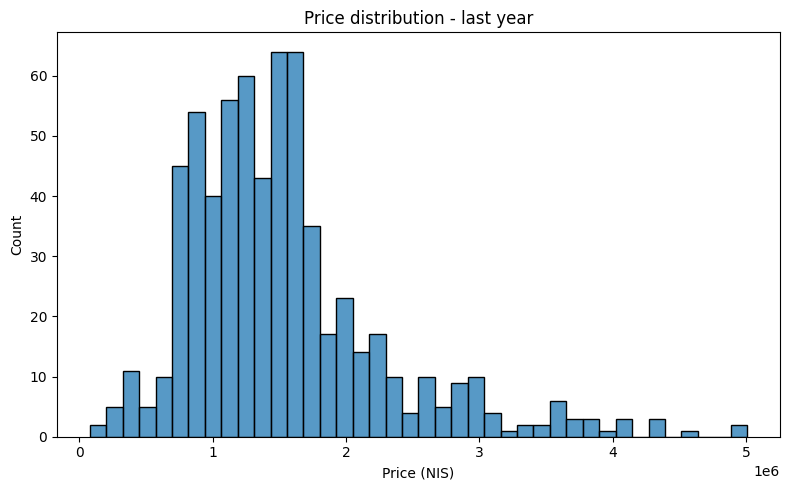

In [4]:
apartments_analysis.plot_hist_last_year(df)

Saved /home/guy/guy/biology/courses/oct_2025/basic_programming_skills/python-course-assignments/day08/outputs/avg_price_per_m2_by_group.png


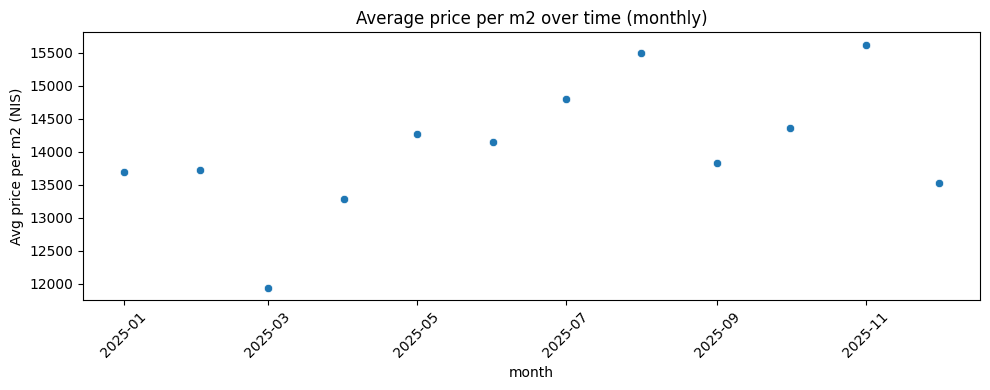

In [5]:
apartments_analysis.plot_avg_price_per_m2(df)

Saved /home/guy/guy/biology/courses/oct_2025/basic_programming_skills/python-course-assignments/day08/outputs/price_per_m2_vs_size.png


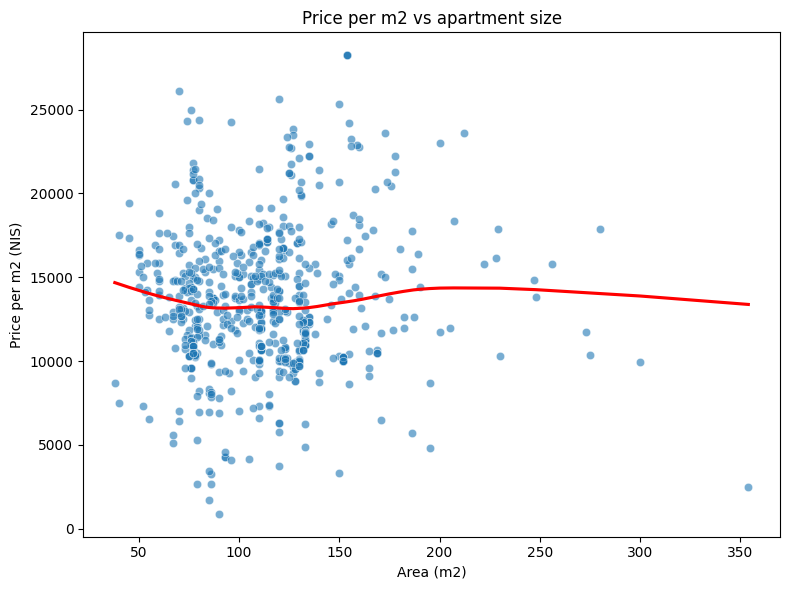

In [6]:
apartments_analysis.plot_price_per_m2_vs_size(df)

Saved /home/guy/guy/biology/courses/oct_2025/basic_programming_skills/python-course-assignments/day08/outputs/avg_price_per_m2_by_month.png


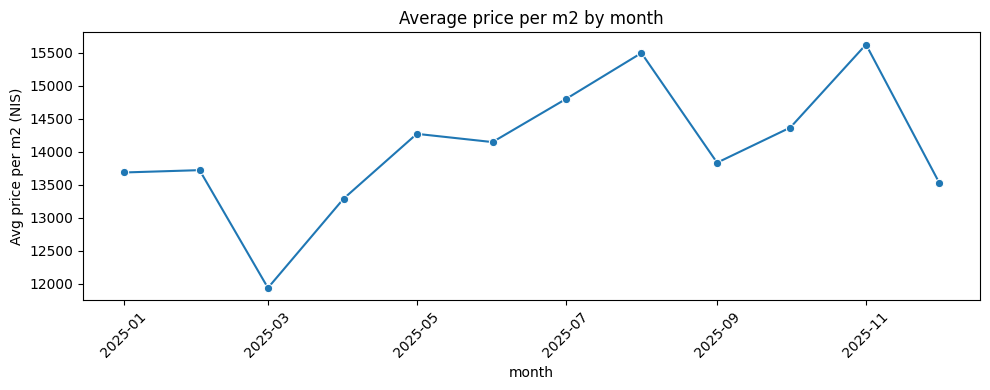

In [7]:
apartments_analysis.plot_avg_price_per_m2_by_month(df)

Saved /home/guy/guy/biology/courses/oct_2025/basic_programming_skills/python-course-assignments/day08/outputs/transactions_count_trend.png


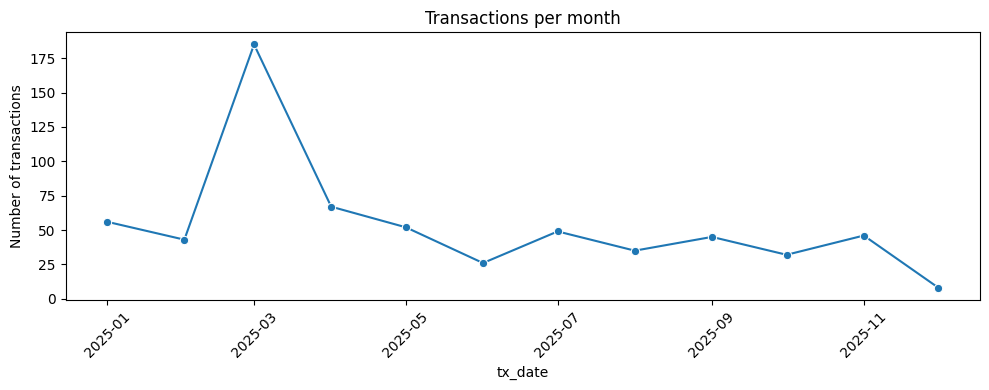

In [8]:
apartments_analysis.plot_transactions_trend(df)

In [9]:
 # generate a dataframe of cheap deals (price_per_m2 < 5000 NIS) and save
cheap_df = df[df['price_per_m2'] < 5000].copy()
cheap_df.describe()


,tx_date,declared_price,share_sold,year_built,area_m2,rooms,price,price_per_m2,year,month
count,16,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16
mean,2025-04-06 04:30:00,420348.812500,0.283750,1985.312500,121.437500,4.031250,420348.812500,3464.048233,2025.0,2025-03-17 06:00:00
min,2025-01-20 00:00:00,80000.000000,0.083000,1970.000000,79.000000,2.000000,80000.000000,888.888889,2025.0,2025-01-01 00:00:00
25%,2025-02-08 18:00:00,268437.500000,0.250000,1980.000000,86.000000,3.000000,268437.500000,2665.095599,2025.0,2025-01-24 06:00:00
50%,2025-03-22 00:00:00,400000.000000,0.250000,1981.000000,93.000000,4.000000,400000.000000,3610.294118,2025.0,2025-03-01 00:00:00
75%,2025-04-29 00:00:00,462499.750000,0.333000,1991.000000,123.250000,4.125000,462499.750000,4301.075269,2025.0,2025-04-01 00:00:00
max,2025-11-28 00:00:00,937500.000000,0.500000,2017.000000,354.000000,10.000000,937500.000000,4887.218045,2025.0,2025-11-01 00:00:00
std,NaN,238605.439679,0.124799,12.705478,69.160652,1.793216,238605.439679,1136.216898,0.0,NaN
